In [1]:
import gym
import numpy as np
import time
from PIL import Image
from IPython.display import display

# Initialize the environment with correct render mode
env = gym.make("Taxi-v3", render_mode="rgb_array")

# Properly handle the output of env.reset() for different gym versions
reset_output = env.reset()
if isinstance(reset_output, tuple):
    state = reset_output[0]  # For newer gym versions
else:
    state = reset_output  # For older gym versions

Q_table = np.zeros((env.observation_space.n, env.action_space.n))  # Example Q-table initialization

def play_episode(env, Q_table, initial_state):
    done = False
    state = initial_state  # Initialize state
    frames = []  # Store frames for the GIF

    for _ in range(100):  # max steps per episode
        action = np.argmax(Q_table[state])  # Select action based on Q-table

        # Corrected unpacking for env.step()
        next_state, reward, done, _, _ = env.step(action)

        # Capture the frame and convert to array
        frame = env.render()  # Get rendered frame as RGB array
        frames.append(Image.fromarray(frame[0]))  # Convert to PIL Image
        time.sleep(0.5)  # Adjust speed of rendering

        if done:
            break
        state = next_state

    # Save frames as a GIF
    frames[0].save('taxi_animation.gif', format='GIF', append_images=frames[1:], save_all=True, duration=200, loop=0)

# Run the episode and generate the animation
play_episode(env, Q_table, state)

# Close the environment
env.close()

# Display the saved GIF
display(Image(filename="taxi_animation.gif"))


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.


ValueError: not enough values to unpack (expected 5, got 4)

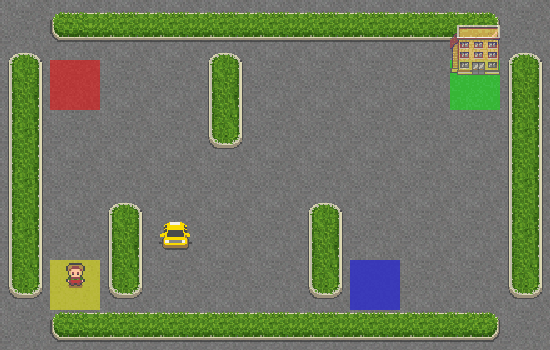

In [3]:
import gym
import numpy as np
import time
from PIL import Image
from IPython.display import display as ip_display  # Renamed to avoid conflict

# Initialize the environment with correct render mode
env = gym.make("Taxi-v3", render_mode="rgb_array")

# Properly handle the output of env.reset() for different gym versions
reset_output = env.reset()
if isinstance(reset_output, tuple):
    state = reset_output[0]  # For newer gym versions
else:
    state = reset_output  # For older gym versions

Q_table = np.zeros((env.observation_space.n, env.action_space.n))  # Example Q-table initialization

def play_episode(env, Q_table, initial_state):
    done = False
    state = initial_state  # Initialize state
    frames = []  # Store frames for the GIF

    for _ in range(100):  # max steps per episode
        action = np.argmax(Q_table[state])  # Select action based on Q-table

        # Corrected unpacking for env.step()
        next_state, reward, done, info = env.step(action)

        # Capture the frame and convert to array
        frame = env.render()  # Get rendered frame as RGB array
        frames.append(Image.fromarray(frame[0]))  # Convert to PIL Image
        time.sleep(0.5)  # Adjust speed of rendering

        if done:
            break
        state = next_state

    # Save frames as a GIF
    frames[0].save('taxi_animation.gif', format='GIF', append_images=frames[1:], save_all=True, duration=200, loop=0)

# Run the episode and generate the animation
play_episode(env, Q_table, state)

# Close the environment
env.close()

# Display the saved GIF
img = Image.open('taxi_animation.gif')  # Use PIL's Image.open() to open the GIF
ip_display(img)  # Display the image using IPython's display function


This code is an implementation of a simple reinforcement learning (RL) environment using OpenAI Gym's **Taxi-v3** environment. It creates an animation by rendering the agent's behavior in the environment, stores the frames as images, and generates a GIF from those frames. Let's go through the code step-by-step:

### Importing Libraries:
```python
import gym  # OpenAI Gym for RL environments
import numpy as np  # For numerical operations, such as handling arrays
import time  # For controlling the speed of the rendering process
from PIL import Image  # To handle and manipulate images (used to create GIF)
from IPython.display import display as ip_display  # To display images in Jupyter notebooks
```

- `gym`: This library is used to create and interact with various reinforcement learning environments. `Taxi-v3` is a classic RL environment that simulates a taxi picking up and dropping off passengers.
- `numpy`: Useful for managing arrays, often used for storing Q-tables or state-action values.
- `time`: Helps manage how fast or slow the frames are displayed when creating an animation.
- `PIL` (`Python Imaging Library`): This library is used to handle and manipulate images. Here, it is used to store frames and generate a GIF.
- `IPython.display`: Specifically for Jupyter notebooks, this is used to display images, such as the generated GIF.

### Initializing the Environment:
```python
env = gym.make("Taxi-v3", render_mode="rgb_array")
```
- `gym.make("Taxi-v3", render_mode="rgb_array")`: This creates an instance of the `Taxi-v3` environment. The `render_mode="rgb_array"` specifies that the environment's output will be rendered as an RGB image array. This array represents the visual output of the environment in terms of colors.

### Resetting the Environment:
```python
reset_output = env.reset()
if isinstance(reset_output, tuple):
    state = reset_output[0]  # For newer gym versions
else:
    state = reset_output  # For older gym versions
```
- `env.reset()` is called to initialize the environment, returning an initial state (the agent's starting position).
- In newer versions of Gym (after version 0.26), `env.reset()` returns a tuple `(state, info)`. For backward compatibility, the code checks the type of `reset_output` and extracts only the state.

### Q-Table Initialization:
```python
Q_table = np.zeros((env.observation_space.n, env.action_space.n))  # Example Q-table initialization
```
- A **Q-table** is initialized to store the state-action values, which are used in Q-learning algorithms for reinforcement learning. The table dimensions are `(n_states, n_actions)`, where `n_states` and `n_actions` correspond to the number of unique states and actions in the environment.
- `env.observation_space.n` gives the number of possible states, and `env.action_space.n` gives the number of possible actions.

### Function to Play an Episode:
```python
def play_episode(env, Q_table, initial_state):
    done = False
    state = initial_state  # Initialize state
    frames = []  # Store frames for the GIF
```
- `play_episode()` is the main function that simulates the agent's behavior in the environment for a single episode.
- `done` is a boolean flag that tells whether the episode has finished.
- `state` is initialized with the starting state from `initial_state`.
- `frames` is an empty list to store the frames that will be used to generate a GIF.

#### Main Loop:
```python
for _ in range(100):  # max steps per episode
    action = np.argmax(Q_table[state])  # Select action based on Q-table
```
- This loop runs for up to 100 steps (or until the episode is done). Each iteration corresponds to one time step in the environment.
- `np.argmax(Q_table[state])`: The agent selects an action based on the Q-table. It chooses the action with the highest value (best expected future reward) for the current state.

```python
next_state, reward, done, info = env.step(action)
```
- `env.step(action)` is called to take the action in the environment. It returns four values:
  - `next_state`: The new state the agent transitions to after taking the action.
  - `reward`: The reward the agent receives for taking that action.
  - `done`: A boolean indicating if the episode has ended.
  - `info`: Additional diagnostic information (not used here).

```python
frame = env.render()  # Get rendered frame as RGB array
frames.append(Image.fromarray(frame[0]))  # Convert to PIL Image
time.sleep(0.5)  # Adjust speed of rendering
```
- `env.render()`: Renders the current state of the environment as an RGB image array.
- `Image.fromarray(frame[0])`: Converts the rendered frame (array) to a PIL Image object for easier manipulation and storage.
- `time.sleep(0.5)`: Pauses for 0.5 seconds between frames, controlling the speed at which the animation is displayed.

```python
if done:
    break
state = next_state
```
- If `done` is `True`, it means the episode has ended, and the loop breaks.
- Otherwise, the state is updated to the `next_state` and the loop continues.

### Saving Frames as a GIF:
```python
frames[0].save('taxi_animation.gif', format='GIF', append_images=frames[1:], save_all=True, duration=200, loop=0)
```
- The first frame (`frames[0]`) is saved as a GIF.
- `append_images=frames[1:]` adds all subsequent frames to the GIF.
- `duration=200` sets the frame duration to 200 milliseconds.
- `loop=0` ensures the GIF loops infinitely.

### Running the Episode:
```python
play_episode(env, Q_table, state)
```
- Calls `play_episode()` to simulate the agent's behavior and generate the animation.

### Closing the Environment:
```python
env.close()
```
- Closes the environment, freeing up any resources it was using.

### Displaying the GIF:
```python
img = Image.open('taxi_animation.gif')  # Use PIL's Image.open() to open the GIF
ip_display(img)  # Display the image using IPython's display function
```
- `Image.open('taxi_animation.gif')`: Opens the generated GIF.
- `ip_display(img)`: Uses `IPython.display.display` to display the GIF in a Jupyter notebook.

---

### Summary:
This code sets up an OpenAI Gym environment for the `Taxi-v3` problem, plays a random episode with a Q-learning agent (although the Q-values are not updated), captures each rendered frame, and stores those frames as a GIF. It then displays the GIF of the agent’s actions during the episode.